In [43]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv("data.csv")

In [45]:
data

,number_photo,uav_lat,uav_lon,uav_alt,point_lat,point_lon,point_bearing,point_pitch,zoom,slt
0,27,39.759450,-8.403348,4500.0,39.761401,-8.403170,4,-10,1.0,1388
1,28,39.759624,-8.404533,4500.0,39.761582,-8.404632,359,-10,2.0,1388
2,29,39.759966,-8.426209,4887.2,39.762570,-8.425658,7,-12,3.9,1402
3,30,39.760112,-8.433932,4501.1,39.760535,-8.433825,8,0,8.0,1372
4,31,39.760973,-8.436261,4500.0,39.761828,-8.436104,8,-5,8.0,1374
5,32,39.759377,-8.420793,4892.6,39.761098,-8.420518,6,-9,12.3,1383
6,33,39.759352,-8.409942,4502.2,39.761305,-8.409965,5,-10,16.1,1389
7,34,39.759352,-8.409609,4900.9,39.761525,-8.409277,4,-10,16.1,1393
8,35,39.759347,-8.402708,4899.6,39.761744,-8.402545,3,-11,20.7,1397
9,36,39.759352,-8.399166,4893.7,39.761306,-8.399122,2,-10,30.9,1387


In [46]:
gnd_truth_lat = 39.986015
gnd_truth_lon = -8.398024
gt_coords = (gnd_truth_lat,gnd_truth_lon)

In [47]:
N = len(data.index)
uav_lats = data['uav_lat'].tolist()
uav_lons = data['uav_lon'].tolist()
uav_coords = list(zip(uav_lats,uav_lons))
point_lats = data['point_lat'].tolist()
point_lons = data['point_lon'].tolist()
point_coords = list(zip(point_lats,point_lons))

In [48]:
dist_uav_to_gt = []
dist_uav_to_point = []
dist_point_to_gt = []

for i in range(N):
    dist_uav_to_gt.append(geodesic(uav_coords[i],gt_coords).nm)
    dist_uav_to_point.append(geodesic(uav_coords[i],point_coords[i]).nm)
    dist_point_to_gt.append(geodesic(point_coords[i],gt_coords).nm)
    
data['d_uav_to_gt'] = dist_uav_to_gt
data['d_uav_to_point'] = dist_uav_to_point
data['d_point_to_gt'] = dist_point_to_gt

In [49]:
data

,number_photo,uav_lat,uav_lon,uav_alt,point_lat,point_lon,point_bearing,point_pitch,zoom,slt,d_uav_to_gt,d_uav_to_point,d_point_to_gt
0,27,39.759450,-8.403348,4500.0,39.761401,-8.403170,4,-10,1.0,1388,13.585384,0.117255,13.468290
1,28,39.759624,-8.404533,4500.0,39.761582,-8.404632,359,-10,2.0,1388,13.576056,0.117474,13.458803
2,29,39.759966,-8.426209,4887.2,39.762570,-8.425658,7,-12,3.9,1402,13.614621,0.158182,13.456790
3,30,39.760112,-8.433932,4501.1,39.760535,-8.433825,8,0,8.0,1372,13.644669,0.025838,13.618896
4,31,39.760973,-8.436261,4500.0,39.761828,-8.436104,8,-5,8.0,1374,13.606981,0.051771,13.555213
5,32,39.759377,-8.420793,4892.6,39.761098,-8.420518,6,-9,12.3,1383,13.628183,0.103958,13.524333
6,33,39.759352,-8.409942,4502.2,39.761305,-8.409965,5,-10,16.1,1389,13.600181,0.117090,13.483235
7,34,39.759352,-8.409609,4900.9,39.761525,-8.409277,4,-10,16.1,1393,13.599567,0.131177,13.468793
8,35,39.759347,-8.402708,4899.6,39.761744,-8.402545,3,-11,20.7,1397,13.591055,0.143901,13.447251
9,36,39.759352,-8.399166,4893.7,39.761306,-8.399122,2,-10,30.9,1387,13.589135,0.117163,13.471983


In [50]:
data.to_csv('data_processed.csv')

In [51]:
map = plt.imread('map.png')

In [52]:
lat_min = 39.7563
lon_max = -8.1385
lat_max = 40.0084
lon_min = -8.5917
bbox = ((lon_min, lon_max, lat_min, lat_max))

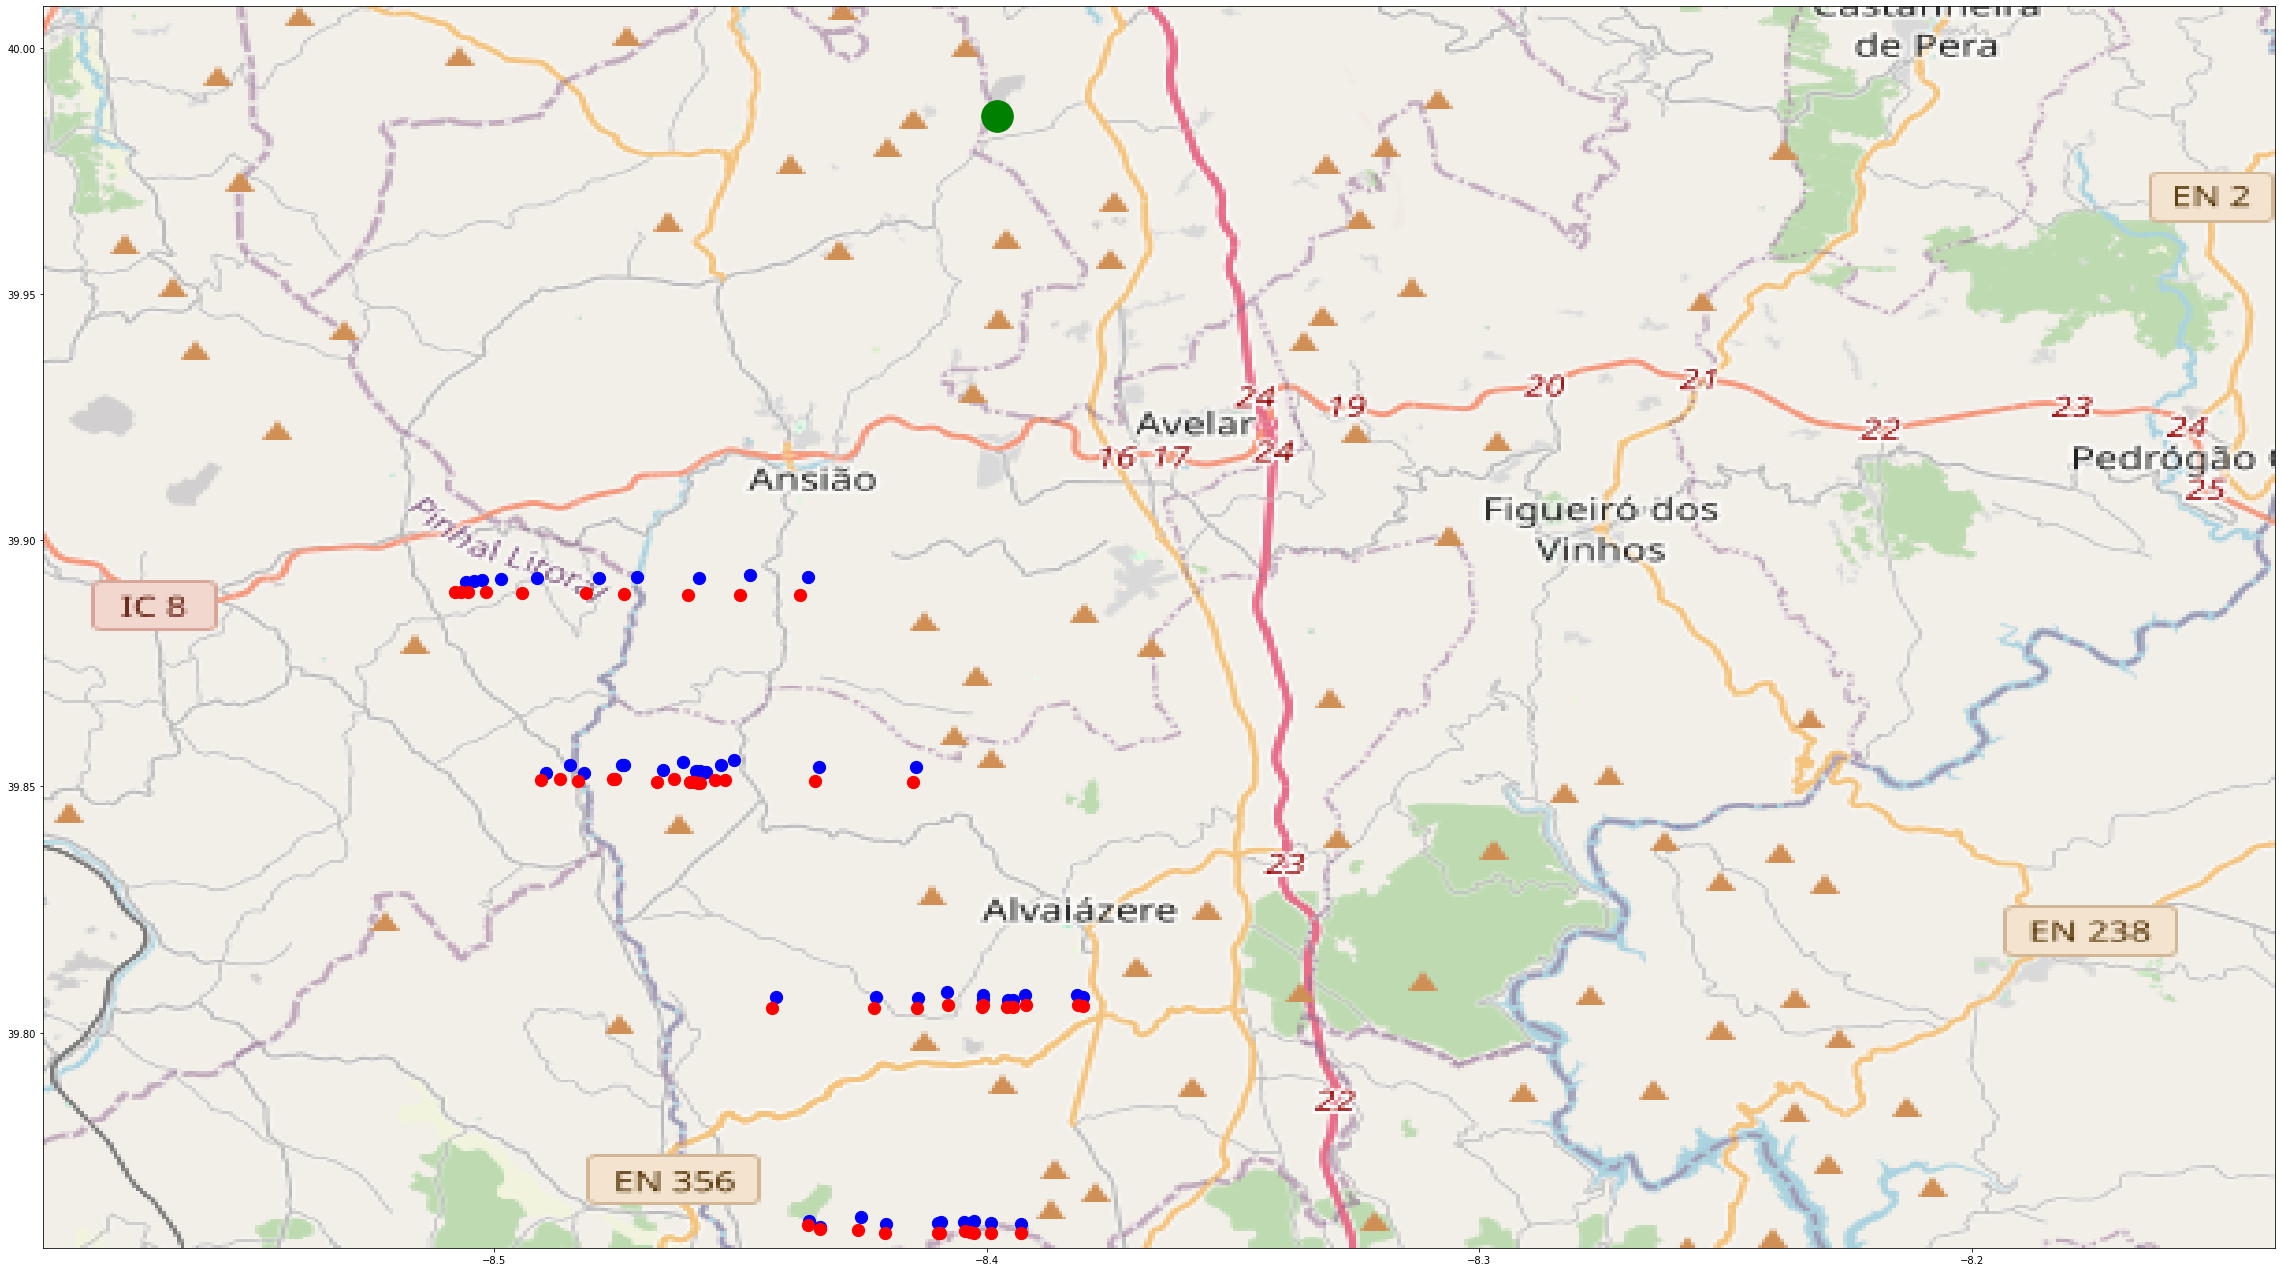

In [53]:
fig, ax = plt.subplots(figsize = (40,35))
ax.scatter(data.point_lon, data.point_lat, zorder=1, c='b', s=150)
ax.scatter(data.uav_lon, data.uav_lat, zorder=1, c='r', s=150)
ax.scatter(gnd_truth_lon, gnd_truth_lat, zorder=1, c='g', s=1000)
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(map, zorder=0, extent = bbox, aspect= 'equal')